In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import warnings

from eofs.xarray import Eof
warnings.filterwarnings("ignore")

In [6]:
sst= xr.open_dataarray("detrended_anm_SD.nc")
sst


<xarray.DataArray (time: 516, lat: 130, lon: 181)> Size: 97MB
[12141480 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 520B 64.75 63.75 62.75 61.75 ... -62.25 -63.25 -64.25
  * lon      (lon) float32 724B 120.0 121.0 122.0 123.0 ... 298.0 299.0 300.0
  * time     (time) datetime64[ns] 4kB 1979-01-16T12:00:00 ... 2021-12-16T12:...
    reftime  (time) datetime64[ns] 4kB ...
    month    (time) int64 4kB ...

In [8]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(sst.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)


In [12]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eofs5 = solver.eofsAsCorrelation(neofs=5)



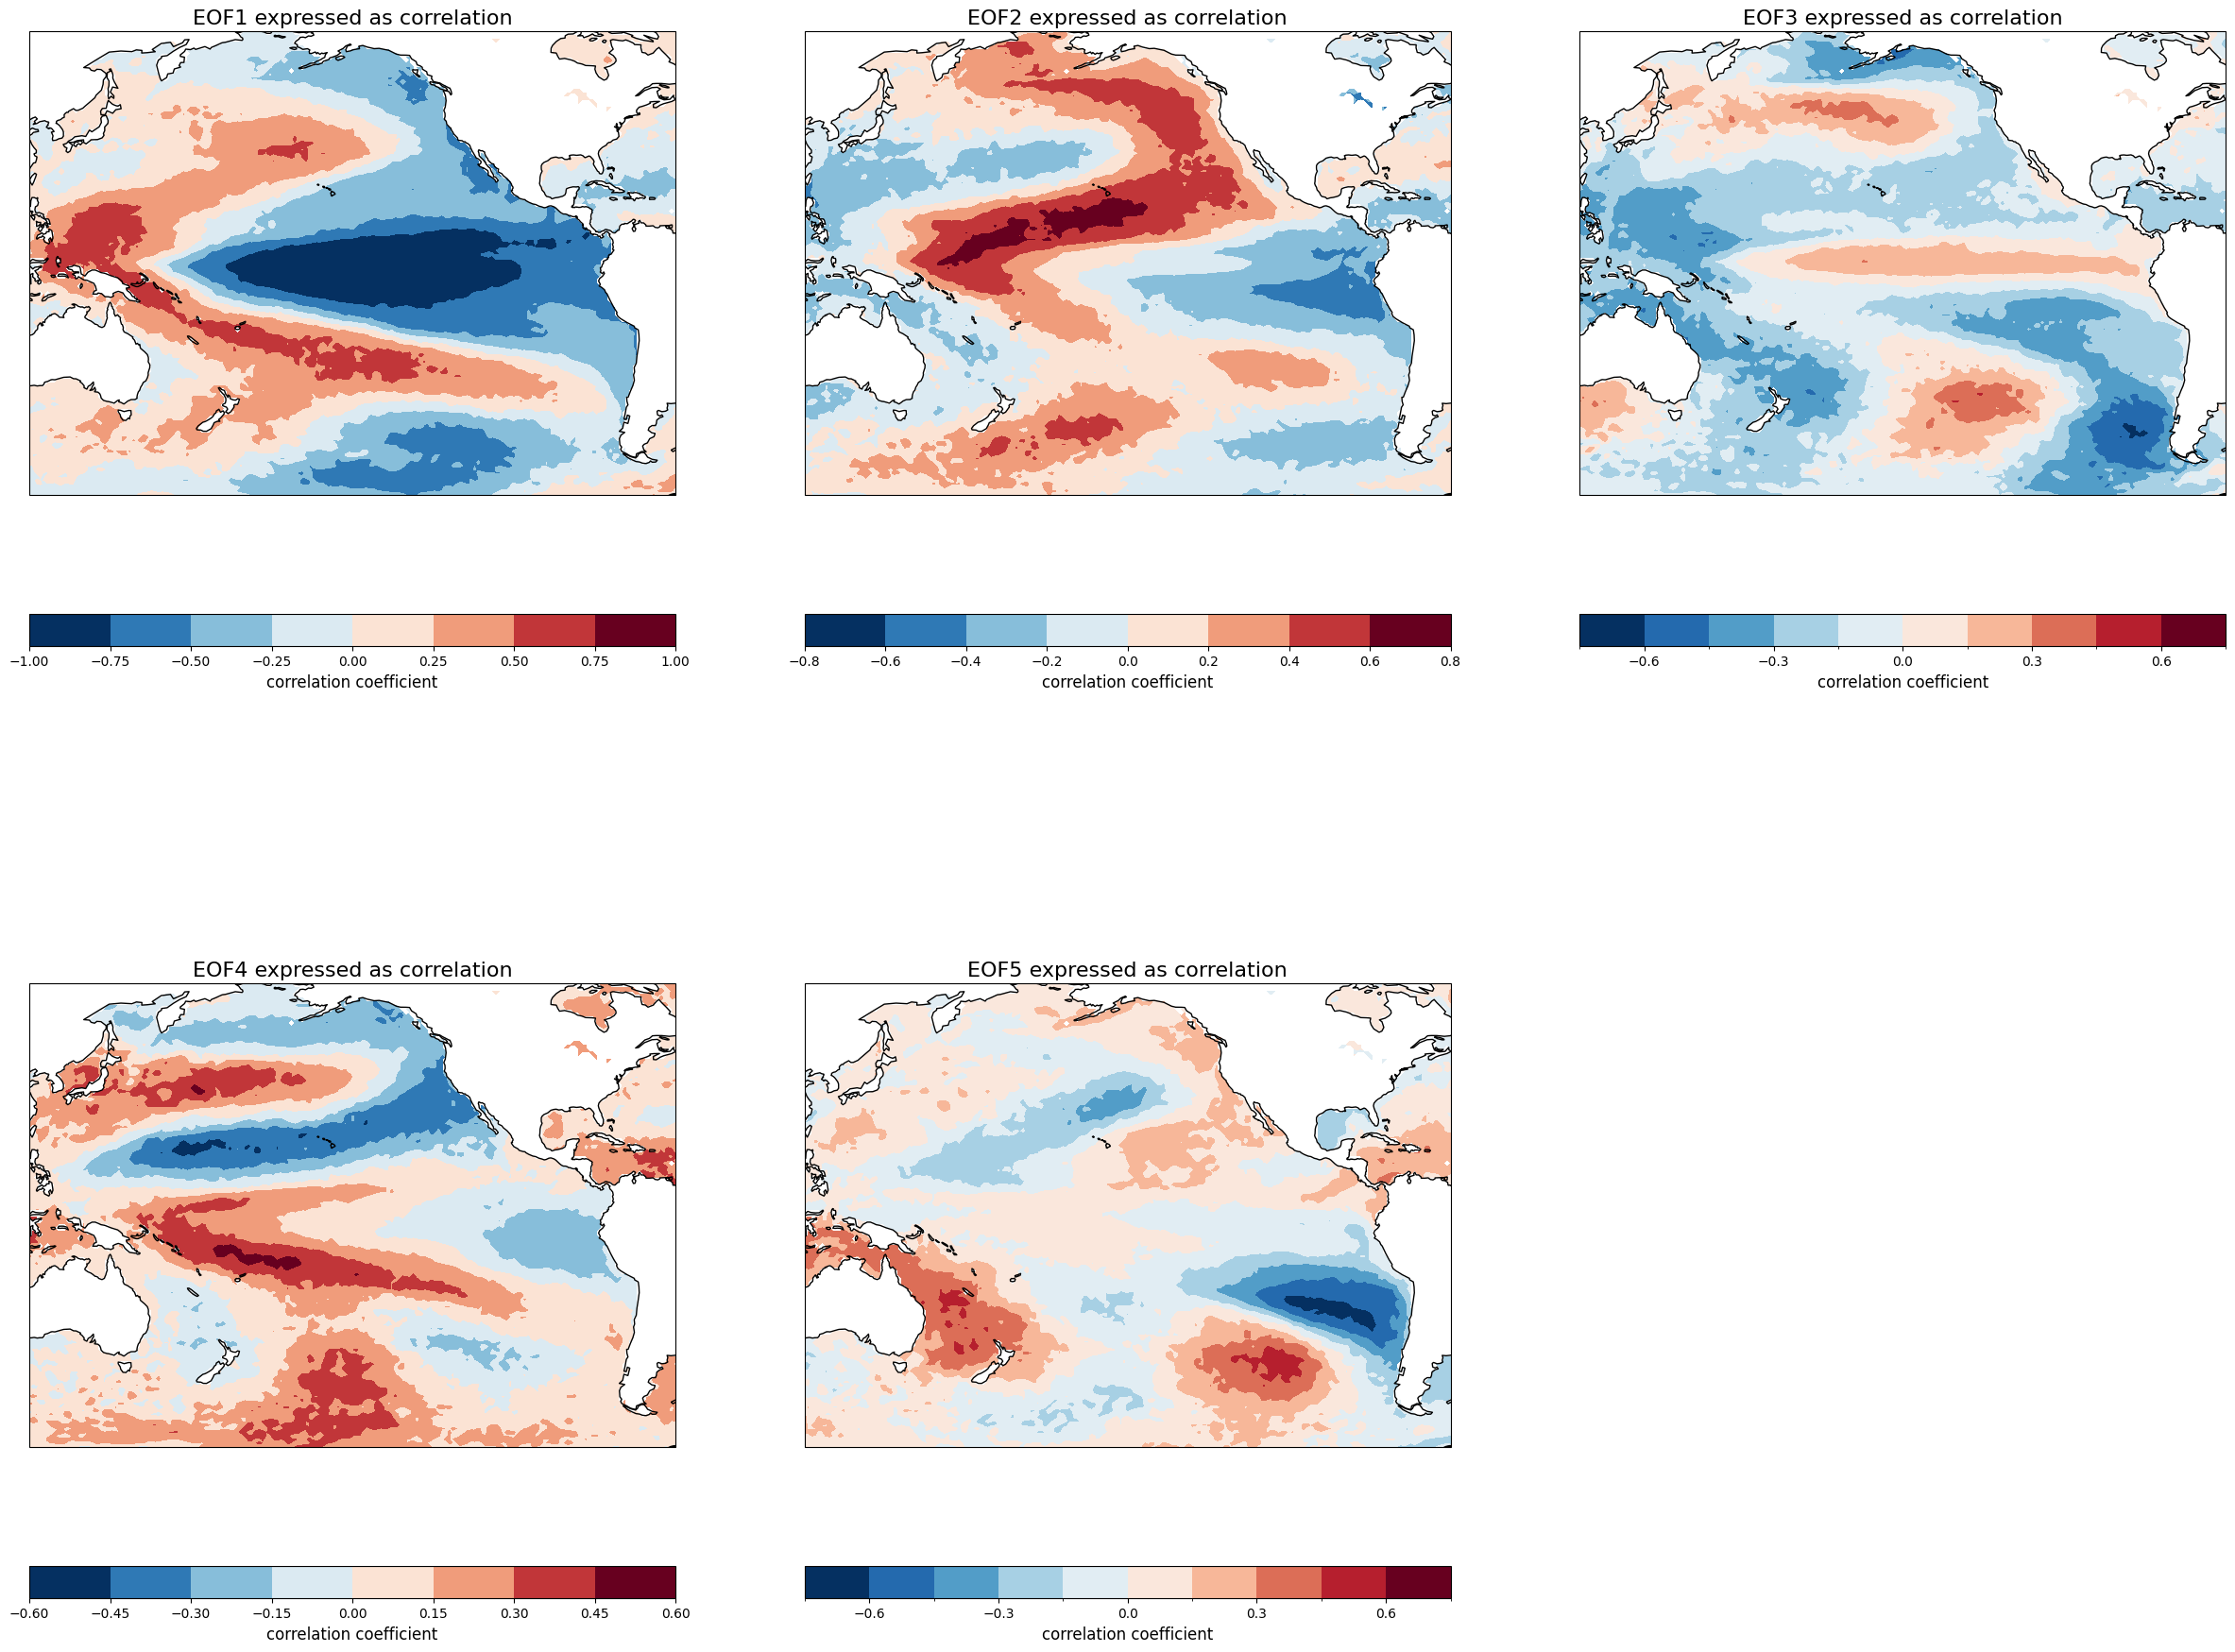

In [15]:
fig = plt.figure(figsize=(30, 24))

for ieof in range(5):
    ax = plt.subplot(2, 3, ieof+1, projection=ccrs.PlateCarree(central_longitude=-150))
    fill = eofs5[ieof].plot.contourf(ax=ax, levels=10, cmap=plt.cm.RdBu_r,
                                     add_colorbar=False, transform=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
    cb = plt.colorbar(fill, orientation='horizontal')
    cb.set_label('correlation coefficient', fontsize=12)
    ax.set_title(f'EOF{ieof+1} expressed as correlation', fontsize=16)

In [16]:
varfrac = solver.varianceFraction()

(1.913573448681996e-33, 0.1928202755470871)

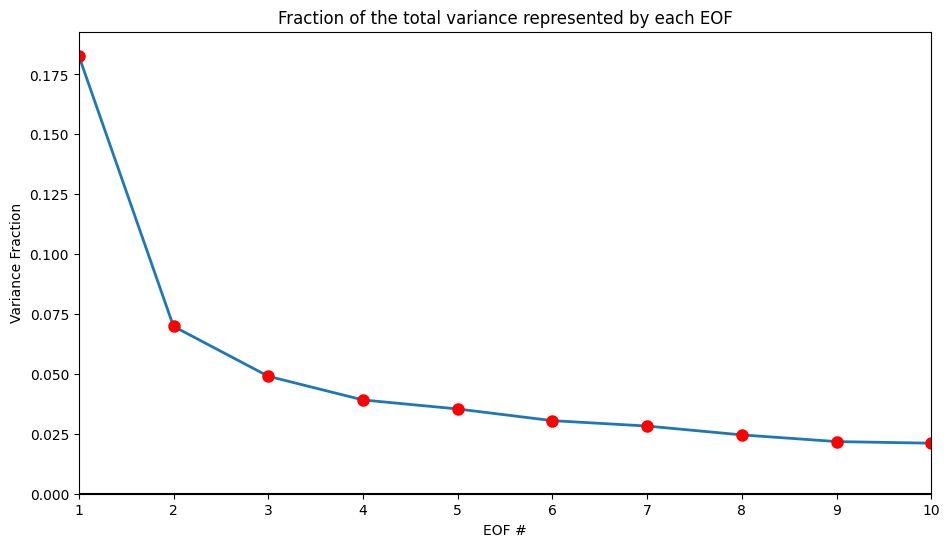

In [20]:
# Plot the fraction of variance explained by each EOF
plt.figure(figsize=(11,6))
eof_num = range(1, 11)
plt.plot(eof_num, varfrac[0:10], linewidth=2)
plt.plot(eof_num, varfrac[0:10], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 11))
plt.title('Fraction of the total variance represented by each EOF')
plt.xlabel('EOF #')
plt.ylabel('Variance Fraction')
plt.xlim(1, 10)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)

In [ ]:
#help(solver.reconstructedField)
reconstruction = solver.reconstructedField(5)
reconstruction